<a href="https://colab.research.google.com/github/AhmedAli288/0-9-Handwriting-Recognition/blob/master/HandWriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
!pip install --upgrade mnist

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
#data_sets
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
#normalizing
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

# flatten the images
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

#print shape
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
# model of 3 layers
# 2 layers with 60 neurons and last with 10 neurons
# 2 layers will have relu function and last will have softmax function
model = Sequential()
model.add(Dense(60, activation='relu', input_dim = 784))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile the model
# loss Function
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# model training
model.fit(
    train_images,
    to_categorical(train_labels), # examples: it expects 3 to be [0,1,1,0,0,0,0,0,0,0]
                                  # it expects 2 to be [0,0,1,0,0,0,0,0,0,0]
    epochs = 7,
    batch_size = 32, # number of samples it takes in one time in each iteration
)

Epoch 1/7
60000/60000 [==============================] - 6s 107us/step - loss: 0.3636 - accuracy: 0.8912
Epoch 2/7
60000/60000 [==============================] - 5s 80us/step - loss: 0.1893 - accuracy: 0.9431
Epoch 3/7
60000/60000 [==============================] - 5s 81us/step - loss: 0.1477 - accuracy: 0.9541
Epoch 4/7
60000/60000 [==============================] - 5s 81us/step - loss: 0.1281 - accuracy: 0.9608
Epoch 5/7
60000/60000 [==============================] - 5s 81us/step - loss: 0.1148 - accuracy: 0.9638
Epoch 6/7
60000/60000 [==============================] - 5s 82us/step - loss: 0.1017 - accuracy: 0.9679
Epoch 7/7
60000/60000 [==============================] - 5s 82us/step - loss: 0.0933 - accuracy: 0.9703


In [ ]:
# test evaluation
model.fit(
    test_images,
    to_categorical(test_labels)
)

Epoch 1/1
10000/10000 [==============================] - 1s 81us/step - loss: 0.0675 - accuracy: 0.9783


In [ ]:
# predictions
predictions = model.predict(test_images[59:64])
print(np.argmax(predictions, axis = 1))
print(test_labels[59:64])

[5 7 8 9 3]
[5 7 8 9 3]


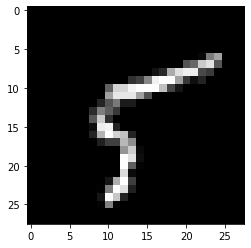

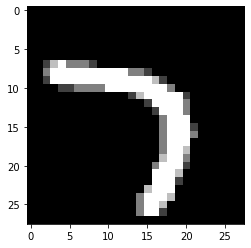

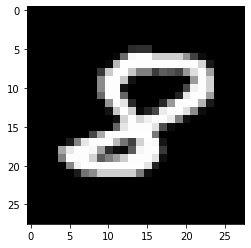

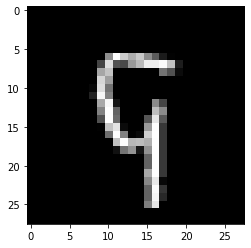

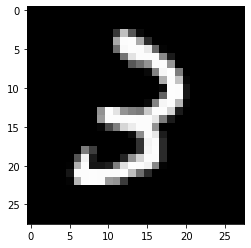

In [ ]:
for i in range(59,64):
  image = test_images[i]
  image = np.array(image, dtype='float')
  pixel = image.reshape((28,28))
  plt.imshow(pixel, cmap = 'gray')
  plt.show()
